In [ ]:
# hide
# skip
! [ -e /content ] && pip install -Uqq model_inspector  # for colab

In [ ]:
# default_exp explore

In [ ]:
# export
from typing import Optional

from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import sklearn.datasets

# explore

> Explore data.

In [ ]:
# hide
from nbdev.showdoc import *

In [ ]:
# export
def plot_correlation(df: pd.DataFrame, ax: Optional[Axes] = None, heatmap_kwargs=None):
    """Create correlation heatmap

    Parameters:
    - `df`: DataFrame
    - `ax`: Matplotlib `Axes` object. Plot will be added to this object
    if provided; otherwise a new `Axes` object will be generated.
    - `heatmap_kwargs`: kwargs to pass to `sns.heatmap`
    """
    if ax is None:
        _, ax = plt.subplots()
    if heatmap_kwargs is None:
        kwargs = {
            "cmap": sns.diverging_palette(h_neg=220, h_pos=10, n=21),
            "annot": True
        }
    return sns.heatmap(
        df.corr(),
        vmin=-1,
        vmax=1,
        ax=ax,
        **kwargs,
    )

In [ ]:
X_diabetes, y_diabetes = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

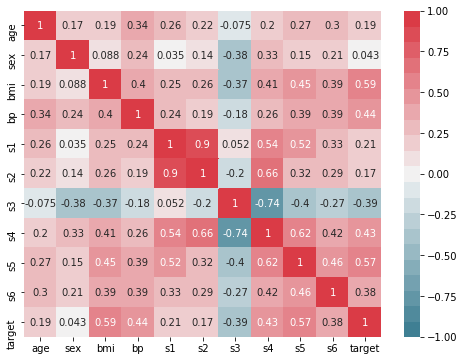

In [ ]:
_, ax = plt.subplots(figsize=(8, 6))
ax = plot_correlation(pd.concat((X_diabetes, y_diabetes), axis="columns"), ax=ax)

In [ ]:
iris = sklearn.datasets.load_iris()
X_iris, y_iris = iris["data"], iris["target"]
y_iris = pd.Series(y_iris, name="iris type").map(
    {num: name for num, name in zip([0, 1, 2], iris["target_names"])}
)
X_iris = pd.DataFrame(X_iris, columns=iris["feature_names"])

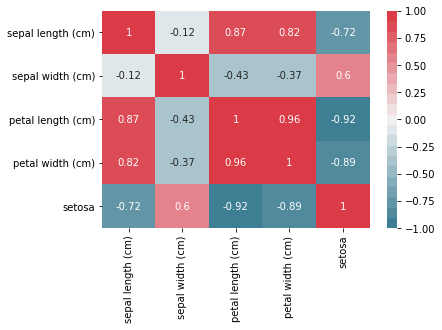

In [ ]:
ax = plot_correlation(pd.concat((X_iris, pd.Series(y_iris == "setosa", name="setosa")), axis="columns"))